In [5]:
import matplotlib.pyplot as plt
import sys
from math import sin, cos, pi
import numpy as np
from numpy.linalg import inv

def G(y, t, m1, l1, m2, l2): 

	# geschwindigkeiten
	a1d, a2d = y[0], y[1]

	# positionen
	a1, a2 = y[2], y[3]

	m11, m12 = (m1+m2)*l1, m2*l2*cos(a1-a2)
	m21, m22 = l1*cos(a1-a2), l2
	m = np.array([[m11, m12],[m21, m22]])

	f1 = -m2*l2*a2d*a2d*sin(a1-a2) - (m1+m2)*g*sin(a1)
	f2 = l1*a1d*a1d*sin(a1-a2) - g*sin(a2)
	f = np.array([f1, f2])

	accel = inv(m).dot(f)

	return np.array([accel[0], accel[1], a1d, a2d])

def RK4_step(y, t, dt, m1, l1, m2, l2):

	k1 = G(y,t, m1, l1, m2, l2) # len(m) x 4
	k2 = G(y+0.5*k1*dt, t+0.5*dt, m1, l1, m2, l2)
	k3 = G(y+0.5*k2*dt, t+0.5*dt, m1, l1, m2, l2)
	k4 = G(y+k3*dt, t+dt, m1, l1, m2, l2)

	return dt * (k1 + 2*k2 + 2*k3 + k4) /6

def update(a1, a2, l1, l2):
	scale = 100
	x1 = l1*scale * sin(a1) #+ offset[0]
	y1 = l1*scale * cos(a1) #+ offset[1]
	x2 = x1 + l2*scale * sin(a2)
	y2 = y1 + l2*scale * cos(a2)

	return (x1, y1), (x2, y2)

# parameters

#massen
#m1_values = np.arange(1,10,1)
#m2 = 1.0

#längen
#l1_values = np.arange(1,10,1)
#l1 = 1.0
#l2 = 1.0

#anfangswinkel
#a1, a2 = pi/4, -1.0
a1, a2 = 0.0, 0.0
g = 9.81

#prev_point = None
t = 0.0
delta_t = 0.02

In [6]:
m1 = np.arange(1,2,0.1)
m2 = np.arange(1,2,0.1)
l1 = np.arange(1,2,0.1)
l2 = np.arange(1,2,0.1)

def time_evolution(t_stop,m1, l1, m2, l2):

    y = np.array([0.0, 0.0, 1.0, 0.0])

    t=0

    t_simulation = np.array([])
    y_simulation = np.array([])

    while t<t_stop:

        t_simulation = np.append(t_simulation,t)
        y_simulation = np.append(y_simulation,y)

        t += delta_t
        y = y + RK4_step(y,t,delta_t,m1,l1,m2,l2)

    y_simulation = y_simulation.reshape(len(t_simulation),4)

    return y_simulation, t_simulation


y_simulation = time_evolution(5,m1[0],l1[0],m2[0],l2[0])[0]
t_simulation = np.arange(0,5+delta_t,delta_t)


In [3]:
#winkel masse 1
winkel1 = y_simulation.reshape(len(t_simulation),4)[:,2] 

#winkel masse 2
winkel2 = y_simulation.reshape(len(t_simulation),4)[:,3]

In [4]:
def update(a1, a2, l1, l2):

	x1 = l1* sin(a1)
	y1 = l1 * cos(a1)
	x2 = x1 + l2 * sin(a2)
	y2 = y1 + l2 * cos(a2)

	return (x1, y1), (x2, y2)


positions = [update(winkel1[i],winkel2[i],l1,l2) for i in range(len(t_simulation))]

positions[0][1]

(0.8414709848078965, 1.5403023058681398)

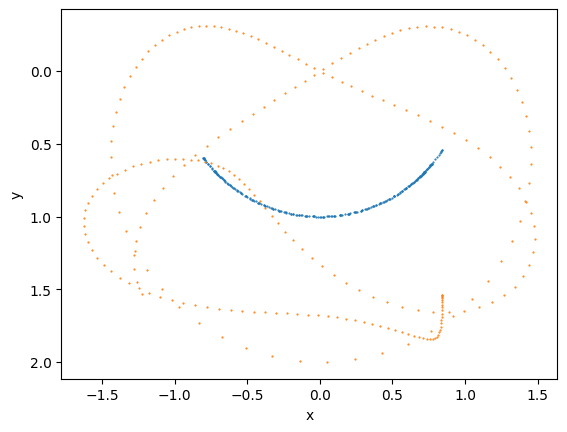

In [5]:
x_positions_masse1 = [positions[i][0][0] for i in range(len(t_simulation))]
y_positions_masse1 = [positions[i][0][1] for i in range(len(t_simulation))]

x_positions_masse2 = [positions[i][1][0] for i in range(len(t_simulation))]
y_positions_masse2 = [positions[i][1][1] for i in range(len(t_simulation))]

plt.scatter(x_positions_masse1,y_positions_masse1,s=0.3)
plt.scatter(x_positions_masse2,y_positions_masse2, s=0.3)

plt.xlabel('x')
plt.ylabel('y')

plt.gca().invert_yaxis()  # Y-Achse umdrehen

In [6]:
#sample masses and lengths from a gaussian distribution

# mean 1
# standarddeviation

# Anzahl der Samples
num_samples = 100000

# gauss distributed values of log(m2/m1)
log_mass_ratio = np.random.normal(loc=0, scale=1, size=num_samples)
log_length_ratio = np.random.normal(loc=0, scale=1, size=num_samples)

mass_ratios= np.exp(log_mass_ratio)
length_ratios = np.exp(log_length_ratio)

m1_values = np.exp(-log_mass_ratio)
l1_values = np.exp(-log_length_ratio)

#m1_values

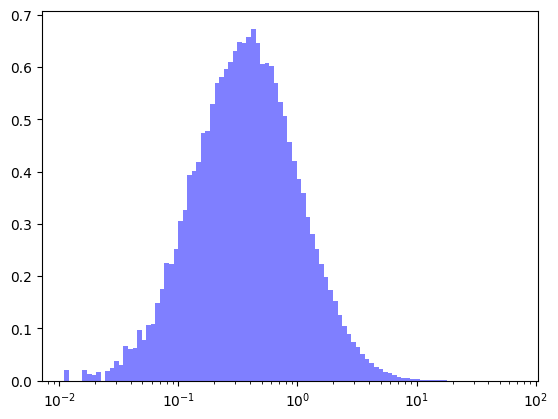

In [ ]:
'''
bins = np.logspace(np.log10(mass_ratios.min()), np.log10(mass_ratios.max()), 100)

plt.hist(np.exp(log_mass_ratio), bins=bins, density=True, alpha=0.5, color='b')
plt.xscale('log')
#plt.xlim(0.3,1.5)

#mach eine achsenbeschreibung
'''

In [8]:
#m1_values = np.arange(1,10,0.1)
print('N_m', len(m1_values))
#l1_values = np.arange(1,10,1)
print('N_l', len(l1_values))

array = [[time_evolution(0.1,m1,l1) for m1 in m1_values] for l1 in l1_values]


print(len(array)) # len(array) = len(m1)
print(len(array[0]))
print(len(array[0][0]))
print(len(array[0][0][0]))

#array hat die dimension len(m) x len(l) x len(time) x 4


N_m 100000
N_l 100000


KeyboardInterrupt: 

In [ ]:
import pandas as pd

In [ ]:
def trajectory_images(m1_v,l1_v, m2_v, l2_v, e_v, labels_csv,t_stop,bildspeichern=True):
        
        labels = []
    
        for i in range(len(m1)):

            
            m1 = m1_v[i]
            l1 = l1_v[i]
            m2 = m2_v[i]
            l2 = l2_v[i]
            e = e_v[i]


            y_simulation = time_evolution(t_stop,m1,l1,m2,l2)[0]
            t_simulation = time_evolution(t_stop,m1,l1,m2,l2)[1]

            #winkel masse 1
            winkel1 = y_simulation.reshape(len(t_simulation),4)[:,2] 

            #winkel masse 2
            winkel2 = y_simulation.reshape(len(t_simulation),4)[:,3]

            #print(l2)

            positions = [update(winkel1[i],winkel2[i],l1,l2) for i in range(len(t_simulation))]

            x_positions_masse1 = [positions[i][0][0] for i in range(len(t_simulation))]
            y_positions_masse1 = [positions[i][0][1] for i in range(len(t_simulation))]

            x_positions_masse2 = [positions[i][1][0] for i in range(len(t_simulation))]
            y_positions_masse2 = [positions[i][1][1] for i in range(len(t_simulation))]

            

            filename = f'/Users/maraludwig/Documents/Master/Deep Learning/project/images/t_m{m1/m2}_l{l1/l2}_e{e}.png'

            labels.append([f't_m{np.round(m1/m2,3)}_l{np.round(l1/l2,3)}_e{np.round(e)}.png', np.round(m1,3), np.round(l1,3)])
            
            plt.figure(figsize=(4, 4),dpi=128)
            
            plt.scatter(x_positions_masse1,y_positions_masse1,s=0.3)
            plt.scatter(x_positions_masse2,y_positions_masse2, s=0.3)

            plt.xlabel('x')
            plt.ylabel('y')

            plt.ylim(-(l1+l2),l1+l2)
            plt.xlim(-(l1+l2),l1+l2)

            plt.gca().invert_yaxis()  # Y-Achse umdrehen

            #plt.show()

            plt.savefig(filename)

        labels_df = pd.DataFrame(labels, columns=['image_name','mass_ratio', 'length_ratio', 'energy_ratio'])
        labels_df.to_csv(labels_csv, index=False)



In [58]:
# Anzahl der Samples
num_samples = 2

# gauss distributed values of log(m2/m1)
log_mass_ratio = np.random.normal(loc=0, scale=1, size=num_samples)
log_length_ratio = np.random.normal(loc=0, scale=1, size=num_samples)



m1_values = np.exp(-log_mass_ratio)

l1_values = np.exp(-log_length_ratio)



[0.70324069 0.85467293]


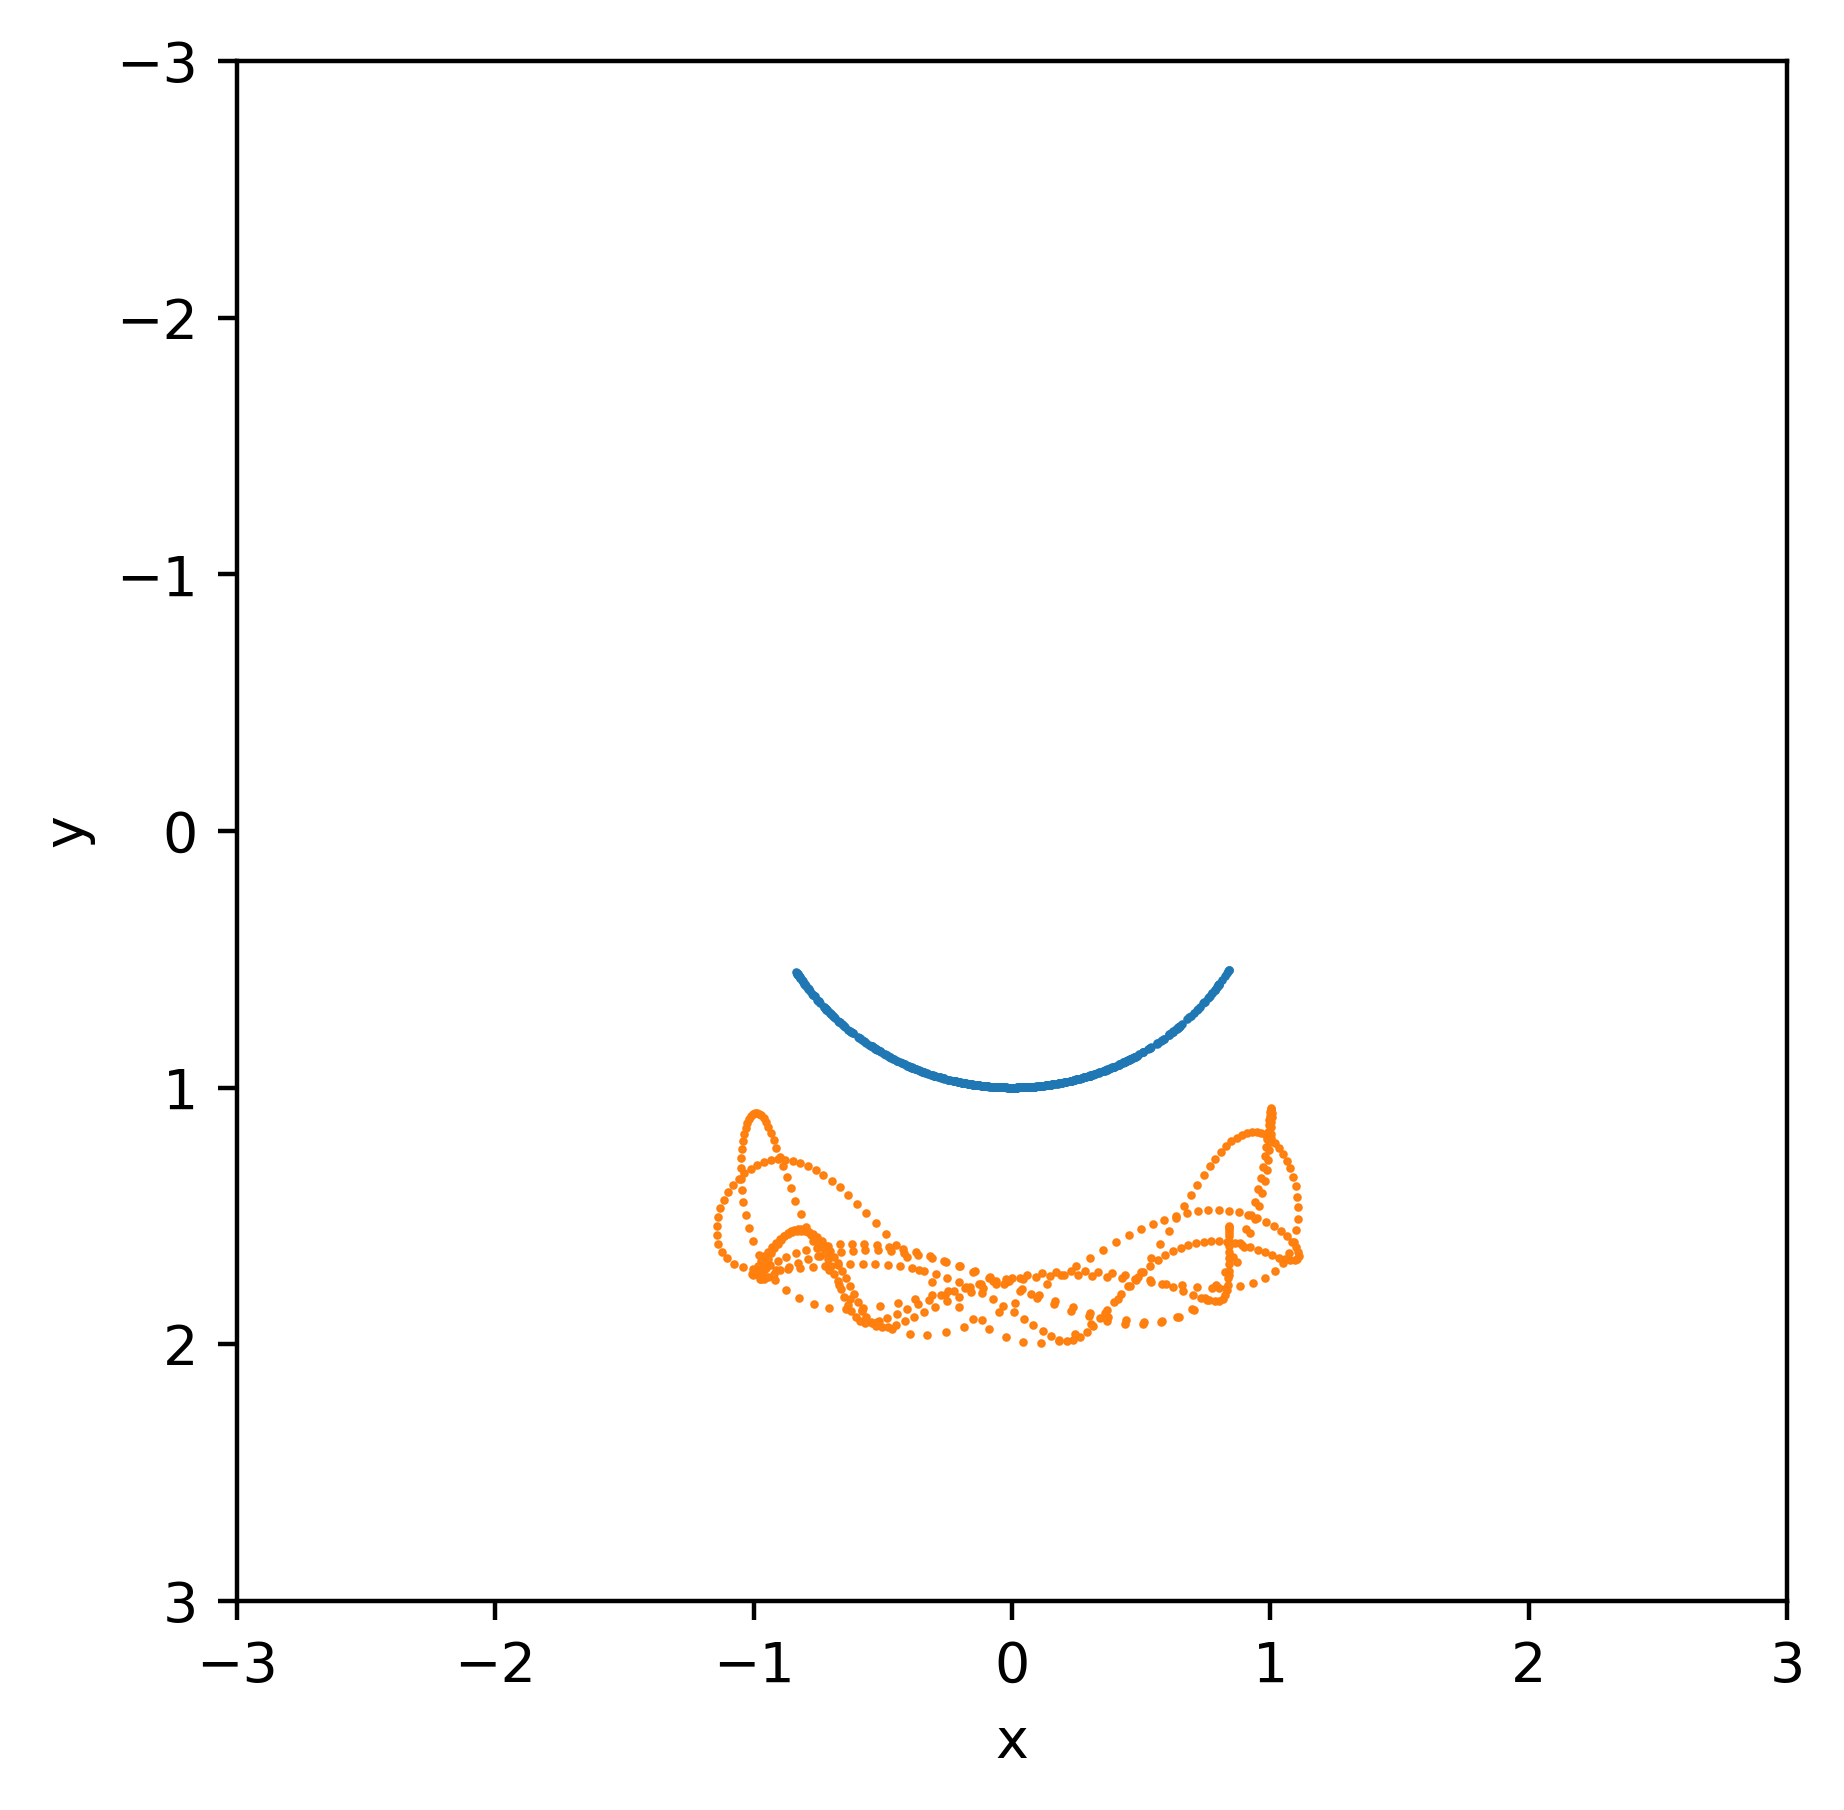

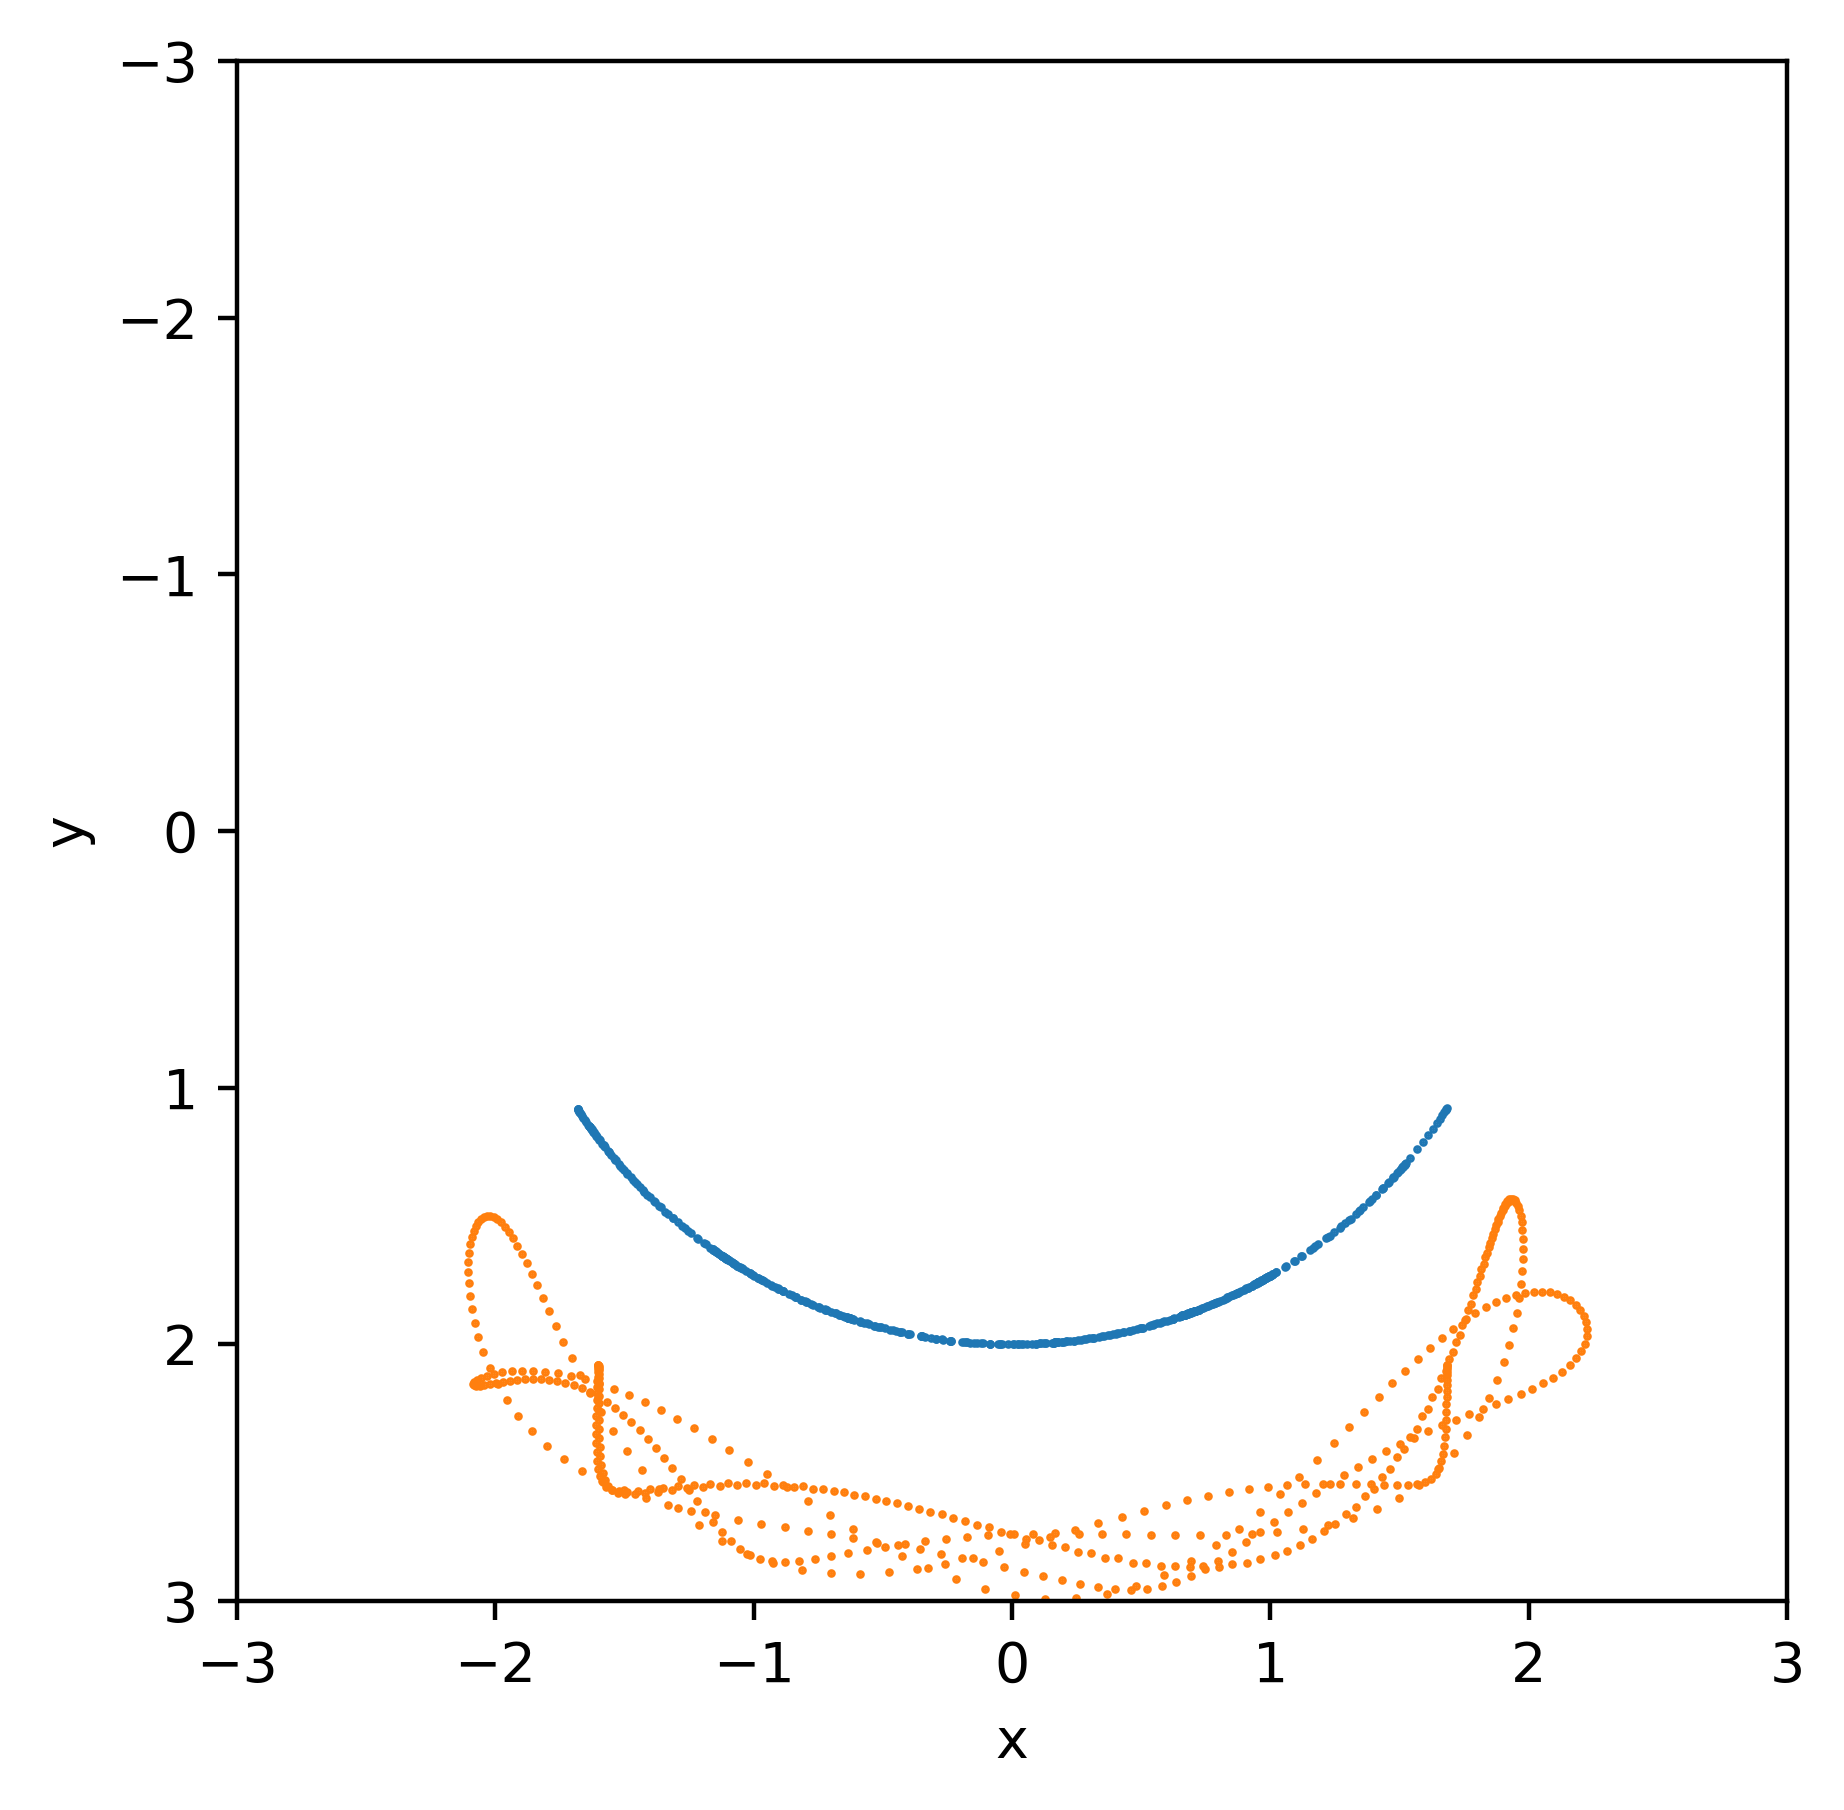

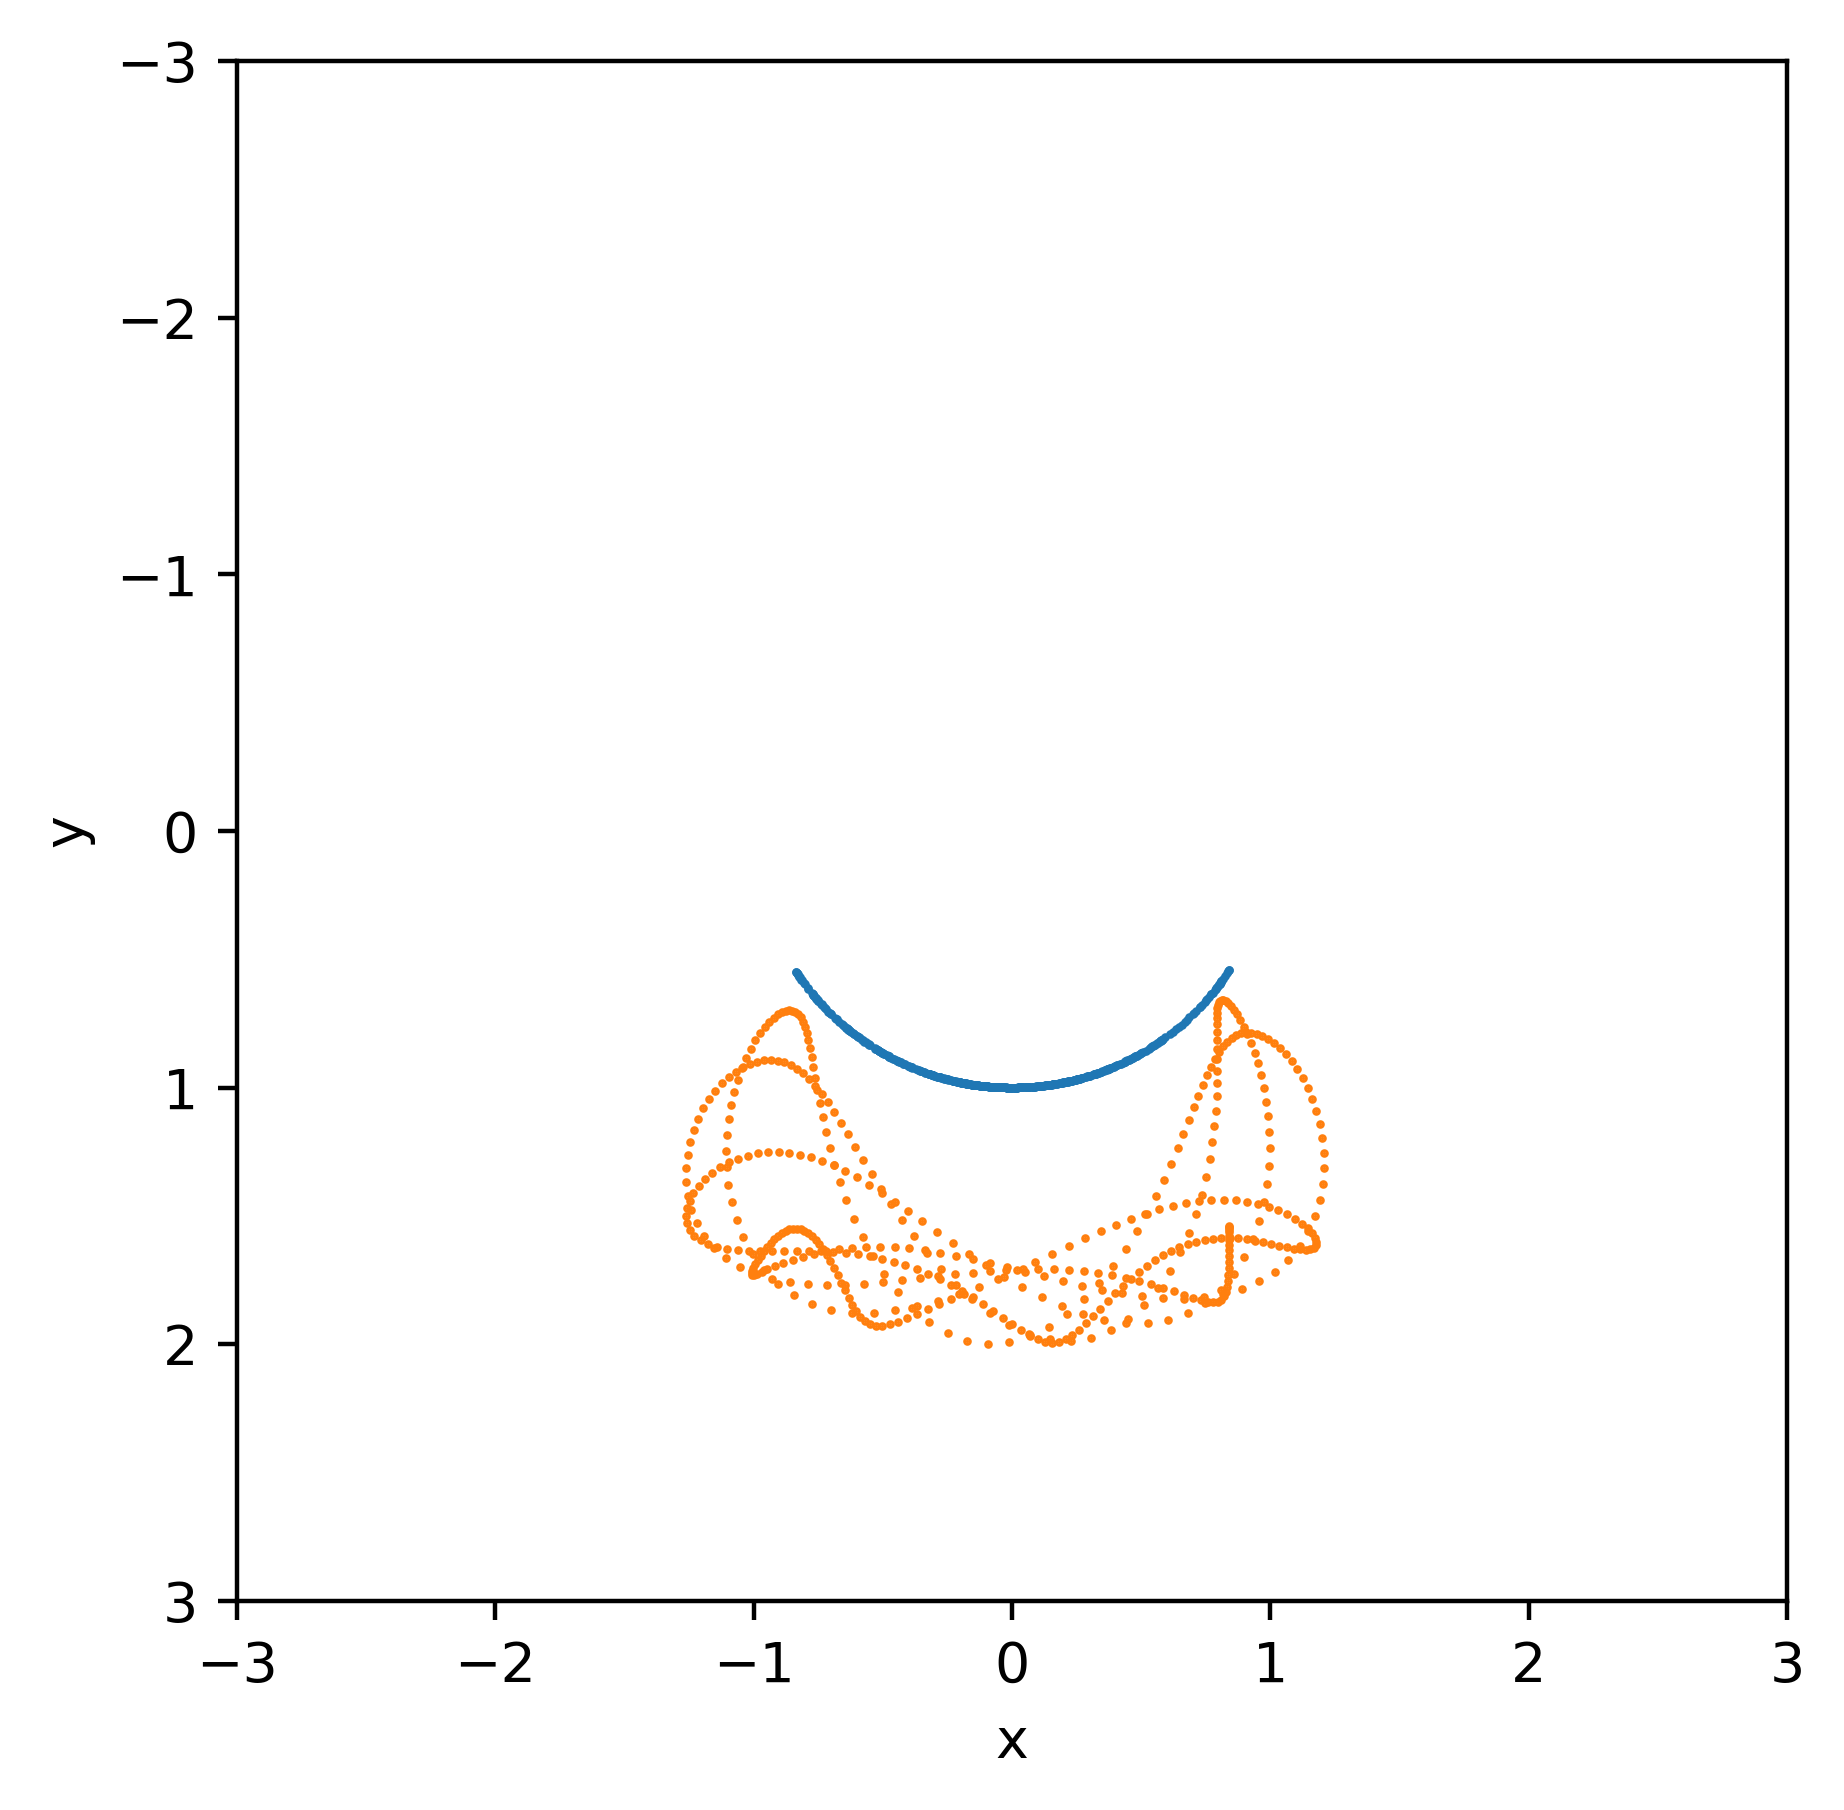

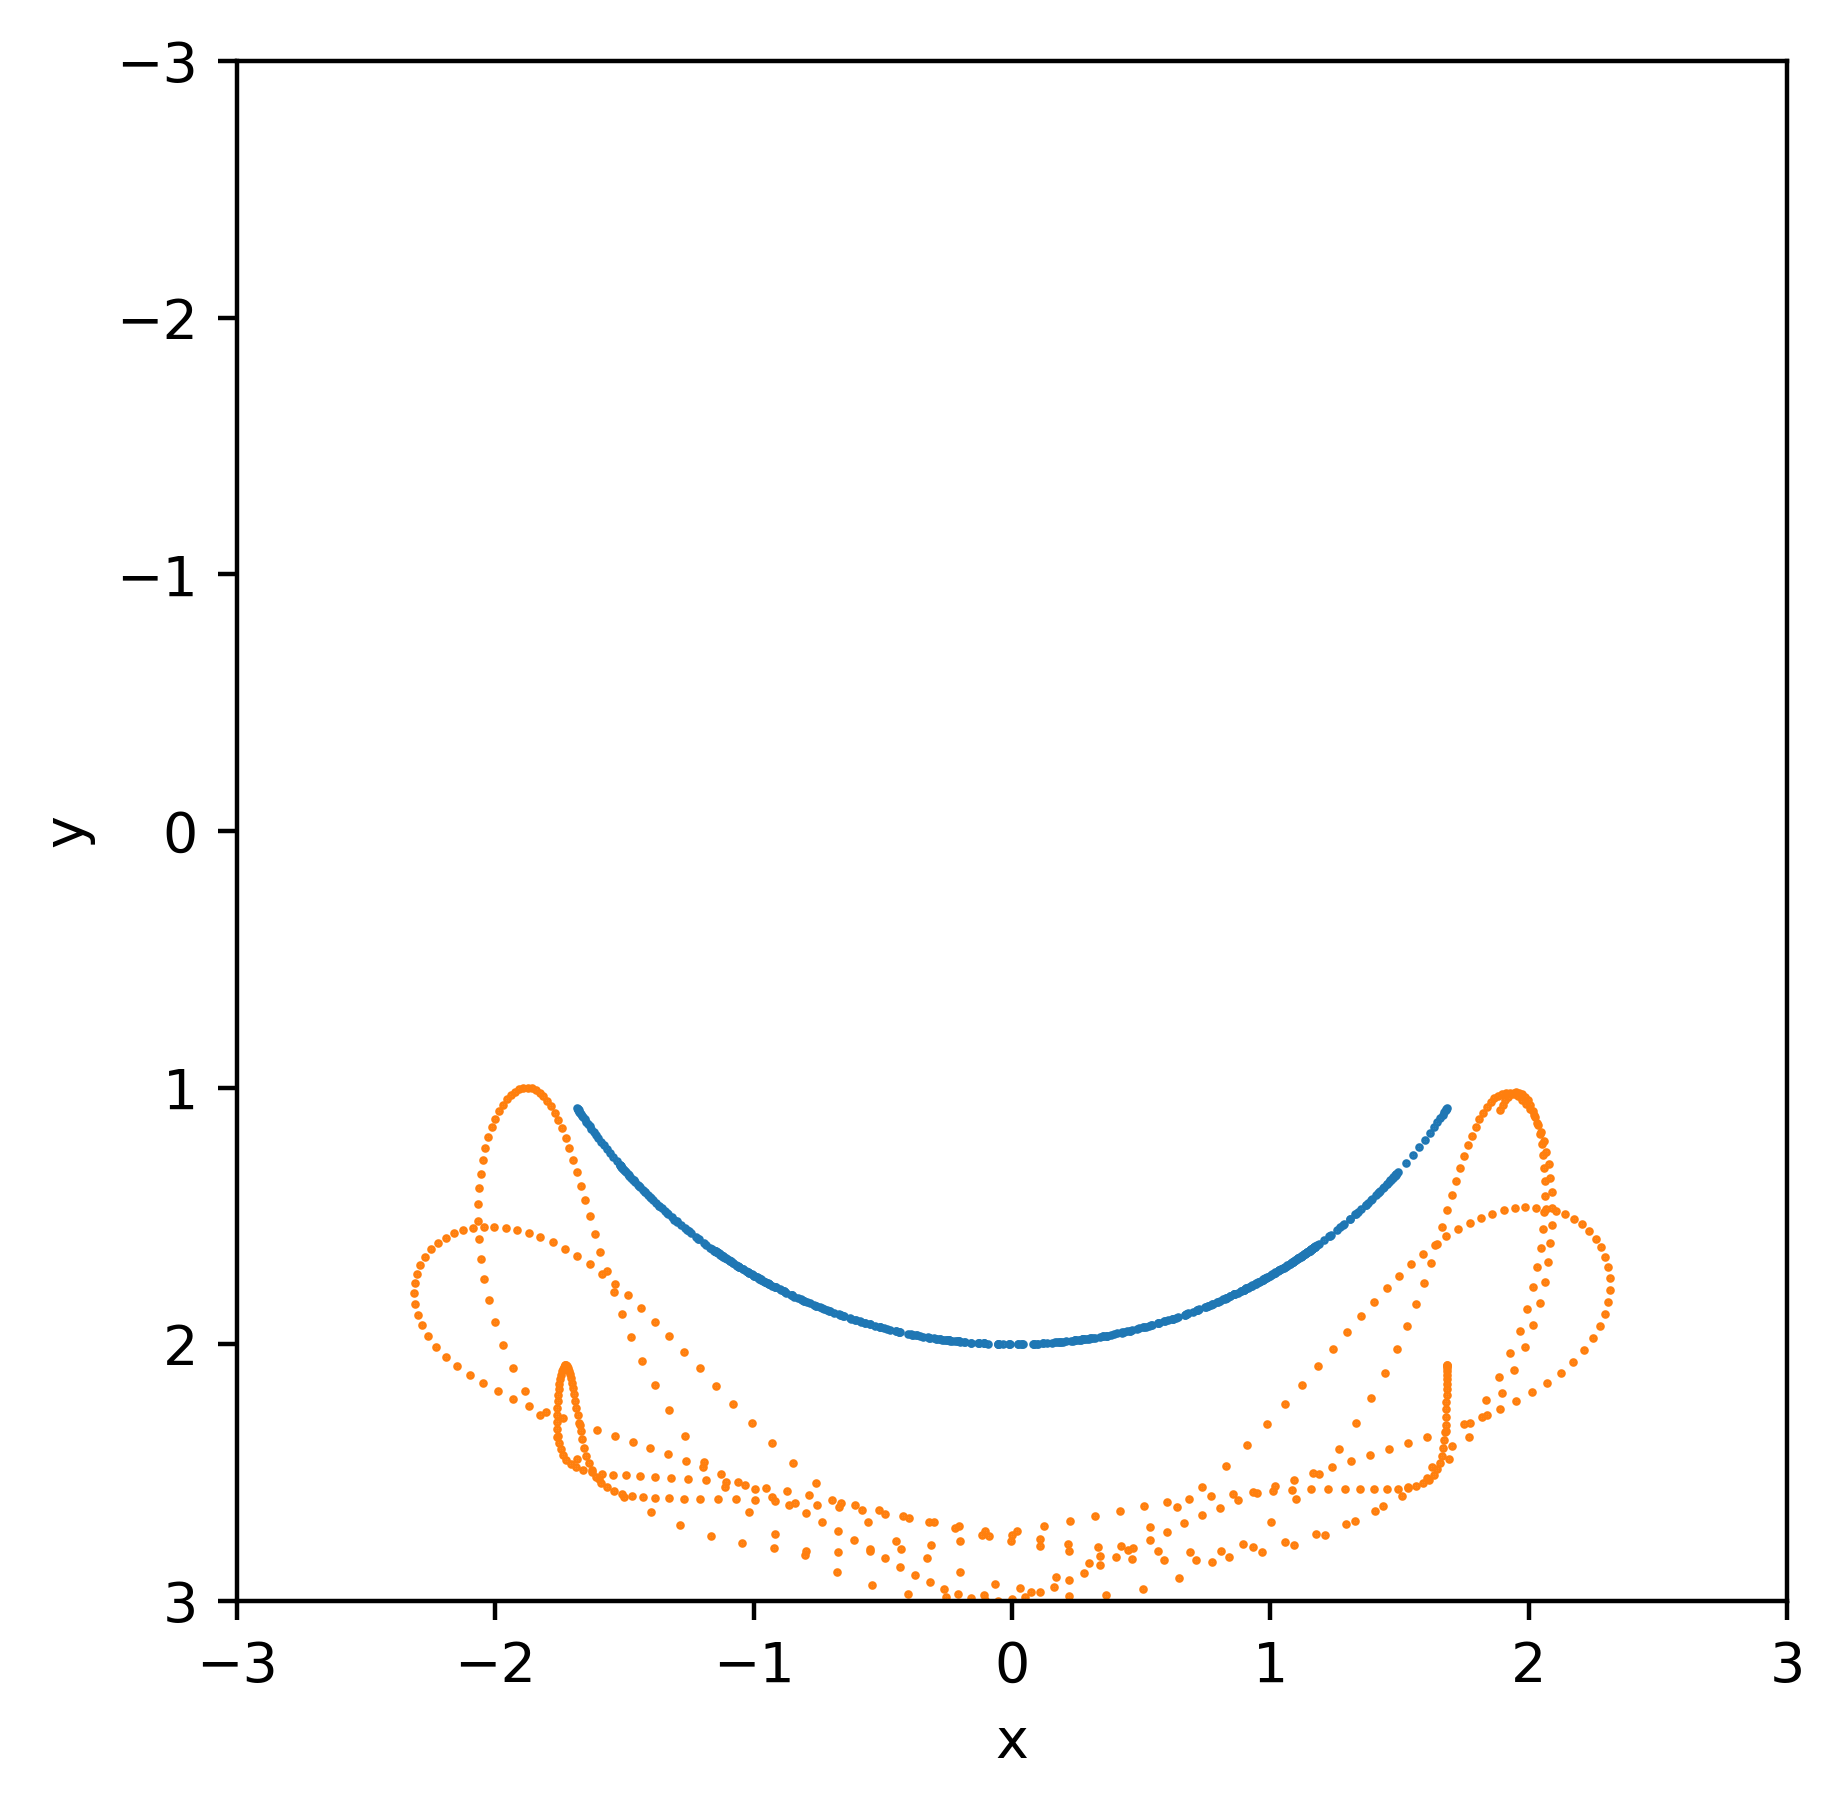

In [59]:
m1_values = np.array([1,2])
l1_values = np.array([1,2])

labels_csv = '/Users/maraludwig/Documents/Master/Deep Learning/project/labels.csv'

trajectory_images(m1_values,l1_values,labels_csv,t_stop=10)

In [71]:
import os
import pandas as pd
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms

# Beispiel Dataset-Klasse für deine eigenen Bilder und Labels
class Dataset(Dataset):
    def __init__(self, image_dir, labels_csv, transform=None):
        """
        :param image_dir: Pfad zu den Bildern
        :param labels_csv: CSV-Datei mit den Labels (Masse, Längenverhältnis)
        :param transform: Optional: Transformationen für die Bilder
        """
        self.image_dir = image_dir
        self.labels_df = pd.read_csv(labels_csv)  # CSV mit den Labels
        self.transform = transform

    def __len__(self):
        return len(self.labels_df)

    def __getitem__(self, idx):
        try:
            # Holen des Bildpfads und der Labels
            img_name = os.path.join(self.image_dir, self.labels_df.iloc[idx, 0])  # Angenommen, die Bilddatei steht in der ersten Spalte
            image = Image.open(img_name).convert('RGB')

            # Holen der Labels (z.B. Masse, Längenverhältnis)
            mass = self.labels_df.iloc[idx, 1]  # Masse ist in der zweiten Spalte
            length_ratio = self.labels_df.iloc[idx, 2]  # Längenverhältnis in der dritten Spalte

            # Labels in ein Tensor umwandeln
            labels = torch.tensor([mass, length_ratio], dtype=torch.float32)

            # Wenn Transformationen definiert sind, anwenden
            if self.transform:
                image = self.transform(image)

            return image, labels
        except Exception as e:
            print(f"Error loading data at index {idx}: {e}")
            return None, None

    def get_labels(self):
        return self.labels_df

# Beispielhafte Transformationen für Bilder

transform = transforms.Compose([
    transforms.Resize((400, 400)),
    transforms.ToTensor(),
])


# Dataset und DataLoader initialisieren
image_dir = '/Users/maraludwig/Documents/Master/Deep Learning/project/images'
labels_csv = '/Users/maraludwig/Documents/Master/Deep Learning/project/labels.csv'
dataset = Dataset(image_dir=image_dir, labels_csv=labels_csv,transform=transform)

# Dataset in Trainings- und Validierungsdaten aufteilen
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# DataLoader erstellen
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=0)

dataset.get_labels()

,image_name,mass_ratio,length_ratio
0,t_m1_l1.png,1,1
1,t_m1_l2.png,1,2
2,t_m2_l1.png,2,1
3,t_m2_l2.png,2,2


In [62]:
def train(args, model, device, train_loader, optimizer, epoch, loss_fn):
    model.train()
    start_time = time.time()
    for batch_idx, (data, target) in enumerate(train_loader):
        if data is None or target is None:
            print(f"Warning: Found None data at batch {batch_idx}")
            continue

        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(data)

        loss = loss_fn(output, target)  # MSE Loss für Regression
        loss.backward()
        optimizer.step()

        if batch_idx % args.log_interval == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')
            if args.dry_run:
                break
    print("--- Epoch time: %s seconds ---" % (time.time() - start_time))

In [ ]:
import torchvision
import torch.nn as nn

# ResNet18 für Regression anpassen
model = torchvision.models.resnet18(weights=torchvision.models.ResNet18_Weights.IMAGENET1K_V1)
model.fc = nn.Linear(model.fc.in_features, 2)  # Zwei Ausgaben (Massenverhältnis, Längenverhältnis)
#model = model.cuda()

# Verlustfunktion für Regression
loss_fn = torch.nn.MSELoss()

In [64]:
import time

def train(args, model, device, train_loader, optimizer, epoch, loss_fn):

    model.train()
    start_time = time.time()
    for batch_idx, (data, target) in enumerate(train_loader):
        

        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(data)

        loss = loss_fn(output, target)  # MSE Loss für Regression
        loss.backward()
        optimizer.step()

        if batch_idx % args.log_interval == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')
            if args.dry_run:
                break
    print("--- Epoch time: %s seconds ---" % (time.time() - start_time))

In [65]:
def test(model, device, test_loader, loss_fn):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)

            test_loss += loss_fn(output, target).item()

    test_loss /= len(test_loader)
    print(f'\nTest set: Average loss: {test_loss:.4f}\n')

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [66]:
import types

In [72]:
num_epochs = 20
args = types.SimpleNamespace(dry_run=False, log_interval=16)

device = "cpu"
for epoch in range(num_epochs):
    train(args, model, device, train_loader, optimizer, epoch, loss_fn)
    test(model, device, val_loader, loss_fn)  # Or with a test loader, if available

Train Epoch: 0 [0/3 (0%)]	Loss: 0.034785
--- Epoch time: 2.8178141117095947 seconds ---

Test set: Average loss: 0.0314

Train Epoch: 1 [0/3 (0%)]	Loss: 0.020395
--- Epoch time: 2.0823161602020264 seconds ---

Test set: Average loss: 0.0253

Train Epoch: 2 [0/3 (0%)]	Loss: 0.006897
--- Epoch time: 1.8982510566711426 seconds ---

Test set: Average loss: 0.0192

Train Epoch: 3 [0/3 (0%)]	Loss: 0.000869
--- Epoch time: 1.9094901084899902 seconds ---

Test set: Average loss: 0.0144

Train Epoch: 4 [0/3 (0%)]	Loss: 0.001359
--- Epoch time: 1.9384608268737793 seconds ---

Test set: Average loss: 0.0110

Train Epoch: 5 [0/3 (0%)]	Loss: 0.004852
--- Epoch time: 1.8985610008239746 seconds ---

Test set: Average loss: 0.0086

Train Epoch: 6 [0/3 (0%)]	Loss: 0.007855
--- Epoch time: 2.112773895263672 seconds ---

Test set: Average loss: 0.0073

Train Epoch: 7 [0/3 (0%)]	Loss: 0.008300
--- Epoch time: 2.97373104095459 seconds ---

Test set: Average loss: 0.0066

Train Epoch: 8 [0/3 (0%)]	Loss: 0.0

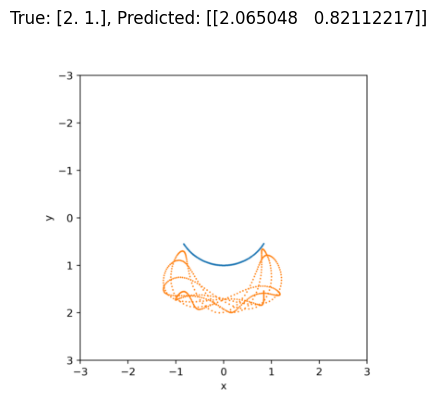

In [74]:
# Funktion zum Anzeigen eines Beispiels
def show_example(model, dataset, index, device):
    model.eval()
    image, labels = dataset[index]
    if image is None or labels is None:
        print(f"Warning: Found None data at index {index}")
        return

    image = image.unsqueeze(0).to(device)  # Füge eine Batch-Dimension hinzu
    with torch.no_grad():
        output = model(image)

    # Konvertiere das Bild zurück zu einem numpy-Array für die Anzeige
    image = image.squeeze(0).cpu().numpy().transpose((1, 2, 0))

    # Rescale the image to [0, 1] range for display
    #image = (image - image.min()) / (image.max() - image.min())

    # Zeige das Bild und die Vorhersagen
    plt.imshow(image)
    plt.title(f"True: {labels.cpu().numpy()}, Predicted: {output.cpu().numpy()}")
    plt.axis('off')
    plt.show()

# Beispiel anzeigen
show_example(model, val_dataset, index=0, device=device)